In [1]:
using CSV, DataFrames
using LinearAlgebra
using PyPlot
using Test
using Printf
using Statistics
using Combinatorics
using Colors

In [2]:
#Have an GUI plot window pop up
pygui(false)

false

In [5]:
#Read in MOFs

_df_henry = CSV.read("../data/Expt_Henry_Coeffs_v2.csv")
for (i, xtal) in enumerate(_df_henry[:crystal])
    # Check replace() out for string replacement
    _df_henry[i, :crystal] = split(split(_df_henry[i, :crystal], ".cif")[1], "_")[1]
end
dropmissing!(_df_henry)
global const df_henry = deepcopy(_df_henry)

,crystal,CO2_henry coefficient [mmol/(g-bar)],Temperature [K],SO2_henry coefficient [mmol/(g-bar)],Temperature [K]_1
,String⍰,Float64⍰,Int64⍰,Float64⍰,Int64⍰
1,Co-CN6,2.44093,298,11.6921,298
2,MFM-300-In,5.04202,298,231.232,298
3,MFM600,1.44924,298,34.7973,298
4,MFM601,1.3703,298,97.2407,298
5,Ni-bdc-ted,2.2069,298,29.6819,298
6,NOTT-202a,3.74269,293,153.6,293
7,NOTT-300,9.83376,293,507.772,293
8,SIFSIX-1-Cu,2.50445,298,3995.77,298
9,SIFSIX-2-Cu-i,17.4887,298,4108.77,298


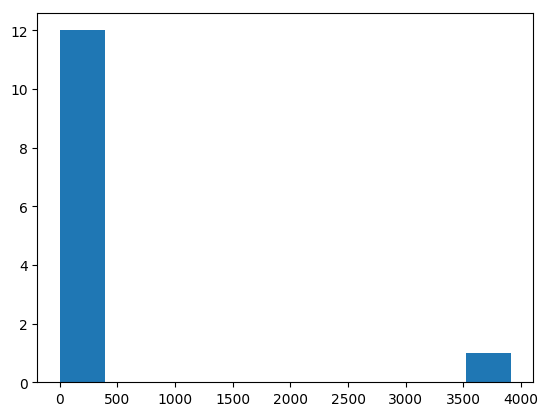

([12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [1.3703, 392.375, 783.379, 1174.38, 1565.39, 1956.39, 2347.4, 2738.4, 3129.41, 3520.41, 3911.41], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57f14e0>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57f12e8>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57f17f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57f1b38>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57f1e80>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57ff240>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57ff5c0>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57ff940>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd57ffcc0>, PyObject <matplotlib.patches.Rectangle object at 0x7f9cd5805080>])

In [6]:
data = df_henry[Symbol("CO2_henry coefficient [mmol/(g-bar)]")]
plt[:hist](data)

In [7]:
function plot_histogram()
    fig = figure(figsize=(10,8))
    gases = ["CO2", "C2H6", "CH4", "H2S"]
    gas_labels = [L"CO$_2$", L"C$_2$H$_6$", L"CH$_4$", L"H$_2$S"]
    gas_textures = ["+", "O", "/", "*"]
    bin_size = 1.35
    maximum_value = maximum([maximum(df_henry[Symbol(gases[i] * "_henry coefficient [mmol/(g-bar)]")]) for i = 1:length(gases)])
    print(typeof(maximum_value))
    for (i, gas) in enumerate(gases)
        plt[:hist](df_henry[Symbol(gas * "_henry coefficient [mmol/(g-bar)]")], label=gas_labels[i],
            alpha=0.65, bins=range(0, stop=maximum_value + bin_size, step=bin_size), hatch=gas_textures[i])
    end
    legend()
    # grid()
    xlabel("Henry Coeffecient (mmol/(g-bar))")
    ylabel("Number of MOFs")
    title("")
    
end
#plot_histogram()

plot_histogram (generic function with 1 method)

In [8]:
function perform_svd(gas1::AbstractString, gas2::AbstractString)
    #Should we create the program for comparing just two MOFs?
    #Or should it be able to compare 3 as well?

    # MOFs[1] indicates the length of the first column, eg. the number of MOFs being screened
    #initialize Henry's Matrix
    N = size(df_henry)[1]
    sigma = zeros(N, N, 2)

    for i = 1:N
        for j = i+1:N
            H = make_h_matrix(i, j, gas1, gas2)
            F = svd(H)
            sigma[i, j, :] = F.S
        end
    end
    return sigma
end

perform_svd (generic function with 1 method)

In [9]:
function make_h_matrix(mof1::Int, mof2::Int, gas1::AbstractString, gas2::AbstractString)
    H = zeros(2,2)
    H[1, 1] = df_henry[mof1, Symbol(gas1 * "_henry coefficient [mmol/(g-bar)]")]
    H[1, 2] = df_henry[mof1, Symbol(gas2 * "_henry coefficient [mmol/(g-bar)]")]
    H[2, 1] = df_henry[mof2, Symbol(gas1 * "_henry coefficient [mmol/(g-bar)]")]
    H[2, 2] = df_henry[mof2, Symbol(gas2 * "_henry coefficient [mmol/(g-bar)]")]
    return H
end

make_h_matrix (generic function with 1 method)

In [11]:
sigma = perform_svd("CO2","SO2")

13×13×2 Array{Float64,3}:
[:, :, 1] =
 0.0  231.585   36.7722   97.955   32.0379  …   506.613    22.6338    13.199 
 0.0    0.0    233.894   250.9    233.189       551.726   232.083    231.331 
 0.0    0.0      0.0     103.295   45.8071      507.54     39.7867    35.1329
 0.0    0.0      0.0       0.0    101.689       514.576    99.1267    97.3518
 0.0    0.0      0.0       0.0      0.0         507.27     35.449     30.1481
 0.0    0.0      0.0       0.0      0.0     …   526.731   154.842    153.711 
 0.0    0.0      0.0       0.0      0.0         705.47    508.23     507.887 
 0.0    0.0      0.0       0.0      0.0        4023.38   3995.82    3995.77  
 0.0    0.0      0.0       0.0      0.0        4135.74   4108.85    4108.81  
 0.0    0.0      0.0       0.0      0.0        4187.26   4173.25    4173.25  
 0.0    0.0      0.0       0.0      0.0     …     0.0     506.813    506.512 
 0.0    0.0      0.0       0.0      0.0           0.0       0.0       19.892 
 0.0    0.0      0.0      

In [12]:
function argmin_without_zero(matrix::Array{Float64, 2})
    index = CartesianIndex(1,1)
    lowest = Inf
    for i = 1:size(matrix)[1]
        for j = 1:size(matrix)[2]
            if matrix[i,j] < lowest && !isapprox(matrix[i,j], 0.0)
                lowest = matrix[i,j]
                index = CartesianIndex(i,j)
            end
        end
    end
    return index, lowest
end
    

argmin_without_zero (generic function with 1 method)

In [13]:
idx, lowest = argmin_without_zero(sigma[:,:,1])

(CartesianIndex(1, 13), 13.199033078992317)

In [14]:
function analyze_svd(sigma::Array{Float64, 3})

    #initialize some arrays
    best_indices = argmax(sigma[:, :, 2]) # finds the largest σ₂ value
    #TODO Needs fixing. worst_indices doesn't work
    worst_indices = argmin_without_zero(sigma[:, :, 1])[1] # finds the smallest σ₁ value

    MOF1 = String(df_henry[best_indices[1], :crystal])
    MOF2 = String(df_henry[best_indices[2], :crystal])

    println("The most sensitive pair of MOFs is " * MOF1 * " and " * MOF2)

    MOF3 = String(df_henry[worst_indices[1], :crystal])
    MOF4 = String(df_henry[worst_indices[2], :crystal])

    println("The least sensitive pair of MOFs is " * MOF3 * " and " * MOF4)

    #error analysis?
    #Delta K/H?

#=
    #create circle array
    n = 1000
    #TODO change to range
    x_lin = linspace(-1,1,n)
    y = zeros(2*n)
    x = zeros(2*n)
    for i = 1:n
        y[2 * i] = sqrt(1 - (x_lin[i] ^ 2))
        y[2 * i - 1] = - sqrt(1 - (x_lin[i] ^ 2))
        x[2 * i] = x_lin[i]
        x[2 * i - 1] = x_lin[i]
    end

    xx = x
    yy = y

    pre_plot = plot(x = xx, y = yy, Geom.point, Guide.xlabel("x"), Guide.ylabel("y"))

    #formats the xy coords appropriately
    xy = hcat(x, y)
    xy = transpose(xy)

    #stretches the xy coords by the sigma from the svd
    highest_sigma = sigma[highest_index[1], highest_index[2]]
    sigma = [highest_sigma[1] 0; 0 highest_sigma[2]]
    println(sigma)
    xy_stretched = sigma*xy

    post_plot = plot(x = xy_stretched[1,:], y = xy_stretched[2,:], Geom.point, Guide.xlabel("x"), Guide.ylabel("y"))

    return post_plot
    =#
end

analyze_svd (generic function with 1 method)

In [15]:
function mof2index(mof::AbstractString)
    boolarray = mof .== df_henry[:crystal]
    if sum(boolarray) > 1
        @error "More than one MOF match the given MOF name"
    elseif sum(boolarray) == 0
        @error "No MOF matched the given MOF name"
    end
    return argmax(boolarray)
end

mof2index (generic function with 1 method)

In [16]:
function plot_response(mof1::Int, mof2::Int, gas1::AbstractString, gas2::AbstractString)
    H = make_h_matrix(mof1, mof2, gas1, gas2)
    F = svd(H)
    θ = range(0, stop=2*π, length=500)[1:end-1]
    p = transpose(hcat(cos.(θ), sin.(θ))) # set pt change
    n = H * p # required input

    S = perform_svd(gas1, gas2)
    biggest_σ = maximum(S[:, :, 1])

    function plot_vector(x; head_length=0.05, head_width=0.05, color="k", label="", label_dist=0.05)
        x_plot = x - head_length * x / norm(x)
        arrow(0, 0, x_plot[1], x_plot[2], head_width=head_width,
            head_length=head_length, fc=color, ec=color, zorder=1000000)
        x_label = x + x / norm(x) * label_dist
        text(x_label[1], x_label[2], label)
    end

    cnorm = PyPlot.matplotlib[:colors][:Normalize](vmin=0.0, vmax=2 * π)

    m = plt[:cm][:ScalarMappable](norm=cnorm, cmap=plt[:cm][:hsv])
    m[:set_array]([]) # trick


    figure(figsize=(11, 5))
    subplot(121, aspect="equal")
    for i = 1:length(θ)-1
        plot(p[1, i:i+1], p[2, i:i+1], lw=5, c=m[:to_rgba](mean(θ[i:i+1])))
    end
    xlim([-1.1, 1.1])
    ylim([-1.1, 1.1])
    axis("equal")
    xlabel(@sprintf("\$p_{%s}^*\$ (bar)", gas1))
    ylabel(@sprintf("\$p_{%s}^*\$ (bar)", gas2))
    for k = 1:2
        plot_vector(F.V[:, k], color="k",
            label="\$\\mathbf{v}_$k\$", label_dist=0.1)
    end
    title("Composition Space")
    tight_layout()

    subplot(122, aspect="equal")
    ylim([-biggest_σ, biggest_σ])
    xlim([-biggest_σ, biggest_σ])
    for i = 1:length(θ)-1
        plot(n[1, i:i+1], n[2, i:i+1], lw=5, c=m[:to_rgba](mean(θ[i:i+1])))
    end
    for k = 1:2
        plot_vector(F.U[:, k] * F.S[k], head_length=0.005,
            head_width=0.05/3, color="k", label="\$\\sigma_$k\\mathbf{u}_$k\$", label_dist=0.025)
    end
    axis("equal")
    xlabel(@sprintf("\$n_{%i}^*\$ (mmol of total gas)", mof1))
    ylabel(@sprintf("\$n_{%i}^*\$ (mmol of total gas)", mof2))
    title("Response Space")
    tight_layout()
    savefig(@sprintf("composition_response_of_%i_and_%i.png", mof1, mof2), format="png", dpi=300)
end

plot_response(mof1::AbstractString, mof2::AbstractString, gas1::AbstractString, gas2::AbstractString) = plot_response(mof2index(mof1), mof2index(mof2), gas1, gas2)

plot_response (generic function with 2 methods)

In [17]:
function plot_all_responses(gas1::AbstractString, gas2::AbstractString, index_list::Union{Array{Int64, 1}, Missing}=missing; 
                            print_h_matrix::Bool=false, add_legend::Bool=false, color_by_sigma::Int64=2, CN_limit::Float64=100.0)
    
    if color_by_sigma > 2 || color_by_sigma < 1
        error("`color_by_sigma` has to be 1 or 2")
    end
    S = perform_svd(gas1, gas2)
    biggest_σ₂ = maximum(S[:, :, 2])
    
    
    figure(figsize=(11, 5))
    subplot(121, aspect="equal")
    θ = range(0, stop=2*π, length=500)[1:end-1]
    p = transpose(hcat(cos.(θ), sin.(θ))) # set pt change
    #rectangle_1x = range(-2, stop=2, length=100)
    #rectangle_
    
    for i = 1:length(θ)-1
        plot(p[1, i:i+1], p[2, i:i+1], lw=2, c="k")
    end
    xlim([-1.1, 1.1])
    ylim([-1.1, 1.1])
    axis("equal")
    xlabel(@sprintf("\$p_{%s}^*\$ (bar)", gas1))
    ylabel(@sprintf("\$p_{%s}^*\$ (bar)", gas2))
    #for k = 1:2
    #    plot_vector(F.V[:, k], color="r",
    #        label="\$\\mathbf{v}_$k\$", label_dist=0.1)
    #end
    title("Composition Space")
    
    if index_list !== missing
        number_of_mofs = length(index_list)
        if number_of_mofs < 2
            @error "Need more than one index to plot the response!"
        end
        pairs = combinations(index_list, 2)
    else
        number_of_mofs = size(df_henry)[1]
        pairs = combinations(1:number_of_mofs, 2)
    end
    
#    cols = distinguishable_colors(size(collect(pairs))[1]+3, [RGB(1,1,1)])[4:end]
    ax = subplot(122)
    #plt[:yscale]("symlog")
    #plt[:xscale]("symlog")
    axis("equal")

    cnorm = PyPlot.matplotlib[:colors][:Normalize](vmin=0.0, vmax=biggest_σ₂)

    m = plt[:cm][:ScalarMappable](norm=cnorm, cmap=plt[:cm][:rainbow])
    m[:set_array]([]) # trick

    
    for (k, pair) in enumerate(pairs)
        mof1 = df_henry[pair[1], :crystal]
        mof2 = df_henry[pair[2], :crystal]
        label = @sprintf("%s and %s", mof1, mof2)
        #@printf("Plotting %s and %s\n", mof1, mof2)
        H = make_h_matrix(pair[1], pair[2], gas1, gas2)
        #if k == 1
        #    H = [-10 30; 72 9]
        #end
        if print_h_matrix
            println(pair)
            println(H)
        end
        F = svd(H)
        v1 = F.U[:,1] * F.S[1]
        if abs(v1[1]) > abs(v1[2])
            temp = H[1,:]
            H[1,:] = H[2,:]
            H[2,:] = [temp...]
        end
        CN = F.S[1]/F.S[2]
        if CN > CN_limit
            #@printf("Pair %d - %d has too high of a CN: %.3f. Skipping that pair...\n", pair[1], pair[2], CN)
            continue
        end
        @printf("Condition number for %d - %d: %f\n", pair[1], pair[2], CN)
        θ_response = collect(range(0, stop=2*π, length=250))#[1:end - 1]
        θ_response[1] = deepcopy(θ_response[end])
        p_response = transpose(hcat(cos.(θ_response), sin.(θ_response))) # set pt change
        n = H * p_response # required input
        #for i = 1:length(θ_response) - 1
        #    plot(n[1, i:i+1], n[2, i:i+1], alpha=0.75, lw=3, c="#" * string(hex(cols[k])))#, label = label)
        #end
        plot(n[1,:], n[2, :], label=@sprintf("%s - %s",df_henry[pair[1], :crystal], df_henry[pair[2], :crystal]), 
            c=m[:to_rgba](F.S[color_by_sigma]))
    end
    if add_legend
        legend()
    end
    title(@sprintf("Response Space"))
    xlabel(@sprintf("\$n_1\$ (mmol/g)"))
    ylabel(@sprintf("\$n_2\$ (mmol/g)"))
    cbar = colorbar(m)
    cbar[:ax][:set_ylabel](@sprintf("\$ \\sigma_%d \$", color_by_sigma))
end

plot_all_responses(gas1::AbstractString, gas2::AbstractString, mof_list::Array{String, 1}) = plot_all_responses(gas1, gas2, mof2index.(mof_list))

plot_all_responses (generic function with 3 methods)

Condition number for 1 - 2: 106.102774
Condition number for 1 - 3: 19.887276
Condition number for 1 - 4: 43.351277
Condition number for 1 - 5: 22.003695
Condition number for 1 - 6: 71.701153
Condition number for 1 - 7: 229.503584
Condition number for 1 - 8: 1641.932868
Condition number for 1 - 9: 1718.362658
Condition number for 1 - 10: 412.883747
Condition number for 1 - 11: 241.586946
Condition number for 1 - 12: 20.291257
Condition number for 1 - 13: 3.498226
Condition number for 2 - 3: 342.638955
Condition number for 2 - 4: 362.973422
Condition number for 2 - 5: 150.776093
Condition number for 2 - 6: 847.474757
Condition number for 2 - 7: 1087.698242
Condition number for 2 - 8: 818.681285
Condition number for 2 - 9: 1015.789503
Condition number for 2 - 10: 19.421558
Condition number for 2 - 11: 7.366018
Condition number for 2 - 12: 163.500957
Condition number for 2 - 13: 45.598121
Condition number for 3 - 4: 114.430992
Condition number for 3 - 5: 62.120175
Condition number for 3 - 

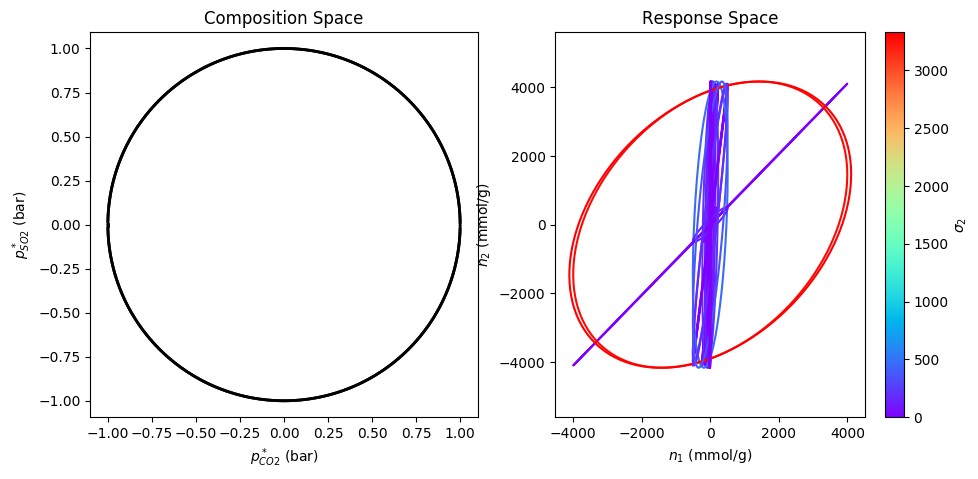

10 - 12: 240.888596
Condition number for 10 - 13: 1823.687562
Condition number for 11 - 12: 93.184621
Condition number for 11 - 13: 159.857804
Condition number for 12 - 13: 4.344692


PyObject Text(954.281,0.5,'$ \\sigma_2 $')

In [19]:
plot_all_responses("CO2", "SO2", CN_limit=Inf)

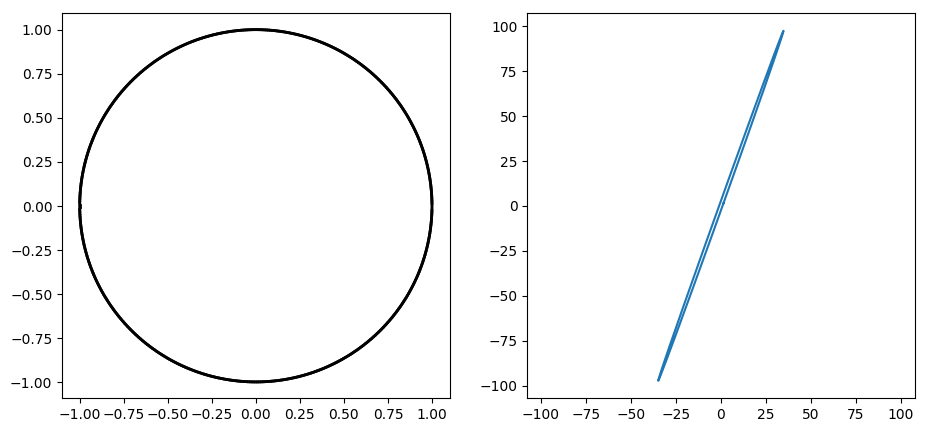

2-element Array{Float64,1}:
 103.29452358696079 
   0.902679610220122

In [21]:
H = make_h_matrix(3,4,"CO2", "SO2")
figure(figsize=(11, 5))
subplot(121, aspect="equal")
θ = range(0, stop=2*π, length=500)[1:end-1]
p = transpose(hcat(cos.(θ), sin.(θ))) # set pt change
for i = 1:length(θ)-1
    plot(p[1, i:i+1], p[2, i:i+1], lw=2, c="k")
end
xlim([-1.1, 1.1])
ylim([-1.1, 1.1])
axis("equal")

ax = subplot(122)
axis("equal")
S = perform_svd("CO2", "SO2")
biggest_σ₂ = maximum(S[:, :, 2])

cnorm = PyPlot.matplotlib[:colors][:Normalize](vmin=0.0, vmax=biggest_σ₂)

m = plt[:cm][:ScalarMappable](norm=cnorm, cmap=plt[:cm][:rainbow])
m[:set_array]([]) # trick

θ_response = collect(range(0, stop=2*π, length=250))#[1:end - 1]
θ_response[1] = deepcopy(θ_response[end])
p_response = transpose(hcat(cos.(θ_response), sin.(θ_response))) # set pt change
n = H * p_response # required input
#for i = 1:length(θ_response) - 1
#    plot(n[1, i:i+1], n[2, i:i+1], alpha=0.75, lw=3, c="#" * string(hex(cols[k])))#, label = label)
#end
plot(n[1,:], n[2, :])
S[3,4,:]

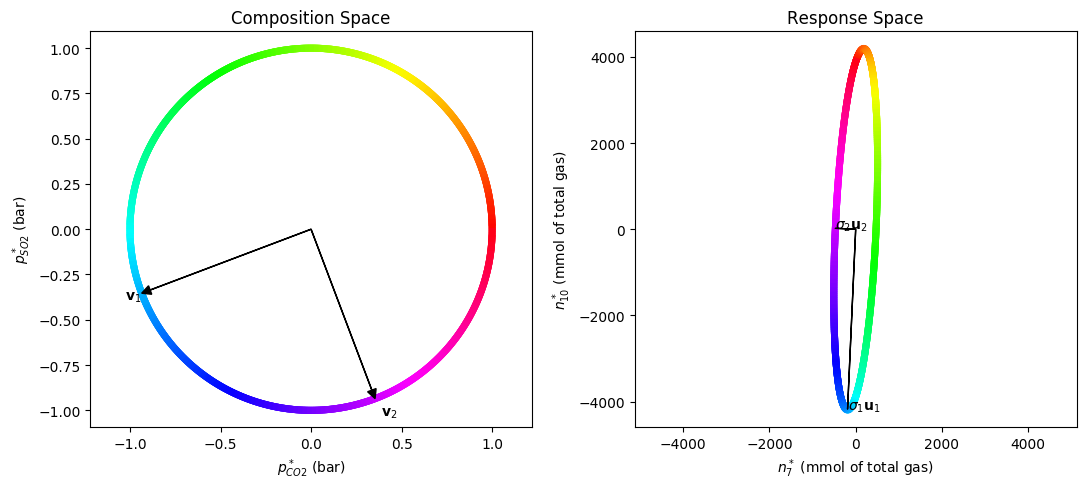

In [22]:
plot_response(7, 10, "CO2", "SO2")

In [23]:
sigma = perform_svd("SO2", "CO2")
analyze_svd(sigma)

The most sensitive pair of MOFs is SIFSIX-2-Cu-i and SIFSIX-3-Ni
The least sensitive pair of MOFs is Co-CN6 and Zn-CN6


In [24]:
#@testset "Sensor Tests" begin
#    H = make_h_matrix(3, 5, "CO2", "C2H6")
#    G = [(8.91e-5) (4.84e-5); (1.87e-5) (4.68e-5)] .- [5.84e-6; 9.56e-6]
#    @test isapprox(H, G)
#end

In [25]:
@testset "MOF to index test" begin
    @test isapprox(mof2index("MIL-101"), 2)
end

┌ Error: No MOF matched the given MOF name
└ @ Main In[15]:6


MOF to index test: Test Failed at In[25]:2
  Expression: isapprox(mof2index("MIL-101"), 2)
   Evaluated: isapprox(1, 2)
Stacktrace:
 [1] macro expansion at ./In[25]:2 [inlined]
 [2] macro expansion at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Test/src/Test.jl:1083 [inlined]
 [3] top-level scope at ./In[25]:2
Test Summary:     | Fail  Total
MOF to index test |    1      1


TestSetException: Some tests did not pass: 0 passed, 1 failed, 0 errored, 0 broken.

# Lets Try another Idea!

In [26]:
function plot_rectangle(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, index_list::Union{Array{Int64, 1}, Missing}=missing)
    wid = range(0, stop=l_gas1, length=20)
    len = range(0, stop=l_gas2, length=20)
    grid_a = [i for i in wid, j in len]
    grid_b = [j for i in wid, j in len]
    p = transpose([grid_a[:] grid_b[:]])

    figure(figsize=(11, 5))
    subplot(121)
    
    scatter(p[1,:], p[2,:], s=3)
    #axis("equal")
    xlim([-0.1*maximum(p[1,:]), maximum(p[1,:]*1.1)])
    ylim([-0.1*maximum(p[2,:]), maximum(p[2,:]*1.1)])
    title("Composition Space")
    xlabel(@sprintf("\$p_{%s}\$ (bar)", gas1))
    ylabel(@sprintf("\$p_{%s}\$ (bar)", gas2))
    xticks(rotation=45)
    ax = subplot(122)
    #axis("equal")
    
    if index_list !== missing
        number_of_mofs = length(index_list)
        if number_of_mofs < 2
            @error "Need more than one index to plot the response!"
        end
        pairs = combinations(index_list, 2)
    else
        number_of_mofs = size(df_henry)[1]
        pairs = combinations(1:number_of_mofs, 2)
    end
    title(@sprintf("Response Space"))
    xlabel(@sprintf("\$n_1\$ (mmol/g)"))
    ylabel(@sprintf("\$n_2\$ (mmol/g)"))

    for (k, pair) in enumerate(pairs)
        mof1 = df_henry[pair[1], :crystal]
        mof2 = df_henry[pair[2], :crystal]
        label = @sprintf("%s and %s", mof1, mof2)
        H = make_h_matrix(pair[1], pair[2], gas1, gas2)
        F = svd(H)
        n = H * p
        scatter(n[1,:], n[2,:], s=3)
        xlim([-0.1*maximum(n[1,:]), maximum(n[1,:]*1.1)])
        ylim([-0.1*maximum(n[2,:]), maximum(n[2,:]*1.1)])
    end
end
    
plot_rectangle(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, mof_list::Array{String, 1}) = plot_rectangle(gas1, gas2, l_gas1, l_gas2, mof2index.(mof_list))

plot_rectangle (generic function with 3 methods)

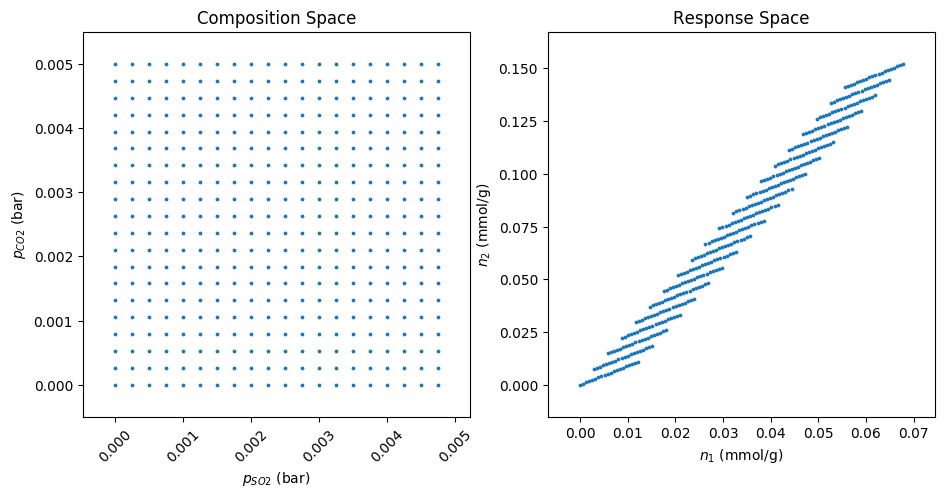

In [27]:
plot_rectangle("SO2", "CO2", 4753.5/1000000.0, 5000.0/1000000.0, [1,5])

In [28]:
function plot_rectangle2(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, index_list::Union{Array{Int64, 1}, Missing}=missing)
    p = [0.0 0.0 l_gas1 l_gas1;
         0.0 l_gas2 l_gas2 0.0]

    figure(figsize=(11, 5))
    subplot(121)
    p_rect = hcat(p, p[:,1])
    for i = 1:size(p_rect)[2]-1
        plot(p_rect[1, i:i+1], p_rect[2, i:i+1], lw=2, c="k")
    end
    #axis("equal")
    #xlim([-0.1*maximum(p[1,:]), maximum(p[1,:]*1.1)])
    #ylim([-0.1*maximum(p[2,:]), maximum(p[2,:]*1.1)])
    title("Composition Space")
    xlabel(@sprintf("\$p_{%s}\$ (bar)", gas1))
    ylabel(@sprintf("\$p_{%s}\$ (bar)", gas2))
    xticks(rotation=45)
    ax = subplot(122)
    axis("equal")
    title(@sprintf("Response Space"))
    xlabel(@sprintf("\$n_1\$ (mmol/g)"))
    ylabel(@sprintf("\$n_2\$ (mmol/g)"))
    
    if index_list !== missing
        number_of_mofs = length(index_list)
        if number_of_mofs < 2
            @error "Need more than one index to plot the response!"
        end
        pairs = combinations(index_list, 2)
    else
        number_of_mofs = size(df_henry)[1]
        pairs = combinations(1:number_of_mofs, 2)
    end

    for (k, pair) in enumerate(pairs)
        mof1 = df_henry[pair[1], :crystal]
        mof2 = df_henry[pair[2], :crystal]
        label = @sprintf("%s and %s", mof1, mof2)
        H = make_h_matrix(pair[1], pair[2], gas1, gas2)
        F = svd(H)
        n = H * p
        n_rect = hcat(n, n[:,1])
        for i = 1:size(n_rect)[2]-1
            plot(n_rect[1, i:i+1], n_rect[2, i:i+1], lw=2, c="b")
        end
        #xlim([-0.1*maximum(n[1,:]), maximum(n[1,:]*1.1)])
        #ylim([-0.1*maximum(n[2,:]), maximum(n[2,:]*1.1)])

    end

end
    
plot_rectangle2(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, mof_list::Array{String, 1}) = plot_rectangle2(gas1, gas2, l_gas1, l_gas2, mof2index.(mof_list))

plot_rectangle2 (generic function with 3 methods)

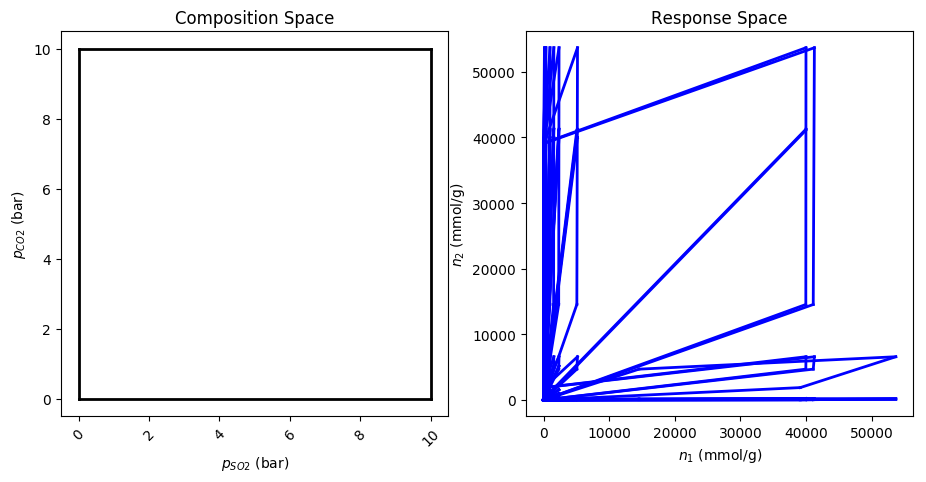

In [32]:
plot_rectangle2("SO2", "CO2", 10., 10.)

In [33]:
function plot_rectangle3(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, index_list::Union{Array{Int64, 1}, Missing}=missing)
    n_pts = 15
    wid = range(0, stop=l_gas1, length=n_pts)
    len = range(0, stop=l_gas2, length=n_pts)
    grid_a = [i for i in wid, j in len]
    grid_b = [j for i in wid, j in len]
    p = transpose([grid_a[:] grid_b[:]])

    figure(figsize=(11, 5))
    subplot(121)
    
    for i = 1:n_pts
        plot([0, wid[end]], [len[i], len[i]], color="k")
        plot([wid[i], wid[i]], [0, len[end]], color="k")
    end
    #scatter(p[1,:], p[2,:], s=3)
    #axis("equal")
    xlim([-0.1*maximum(p[1,:]), maximum(p[1,:]*1.1)])
    ylim([-0.1*maximum(p[2,:]), maximum(p[2,:]*1.1)])
    title("Composition Space")
    xlabel(@sprintf("\$p_{%s}\$ (bar)", gas1))
    ylabel(@sprintf("\$p_{%s}\$ (bar)", gas2))
    xticks(rotation=45)
    ax = subplot(122)
    #axis("equal")
    
    if index_list !== missing
        number_of_mofs = length(index_list)
        if number_of_mofs < 2
            @error "Need more than one index to plot the response!"
        end
        pairs = combinations(index_list, 2)
    else
        number_of_mofs = size(df_henry)[1]
        pairs = combinations(1:number_of_mofs, 2)
    end
    title(@sprintf("Response Space"))
    xlabel(@sprintf("\$n_1\$ (mmol/g)"))
    ylabel(@sprintf("\$n_2\$ (mmol/g)"))

    for (k, pair) in enumerate(pairs)
        mof1 = df_henry[pair[1], :crystal]
        mof2 = df_henry[pair[2], :crystal]
        label = @sprintf("%s and %s", mof1, mof2)
        H = make_h_matrix(pair[1], pair[2], gas1, gas2)
        F = svd(H)
        #n = H * p
        #scatter(n[1,:], n[2,:], s=3)
        for i = 1:n_pts
            coords = [0.0 wid[end] wid[i] wid[i];
                    len[i] len[i] 0.0 len[end]]
            h = H * coords
            h1 = [h[1,1], h[1,2]]
            h2 = [h[2,1], h[2,2]]
            h3 = [h[1,3], h[1,4]]
            h4 = [h[2,3], h[2,4]]    
            plot(h1, h2, color="k")
            plot(h3, h4, color="k")
        end

        #xlim([-0.1*maximum(n[1,:]), maximum(n[1,:]*1.1)])
        #ylim([-0.1*maximum(n[2,:]), maximum(n[2,:]*1.1)])
    end
end
    
plot_rectangle3(gas1::AbstractString, gas2::AbstractString, l_gas1::Float64, l_gas2::Float64, mof_list::Array{String, 1}) = plot_rectangle(gas1, gas2, l_gas1, l_gas2, mof2index.(mof_list))

plot_rectangle3 (generic function with 3 methods)

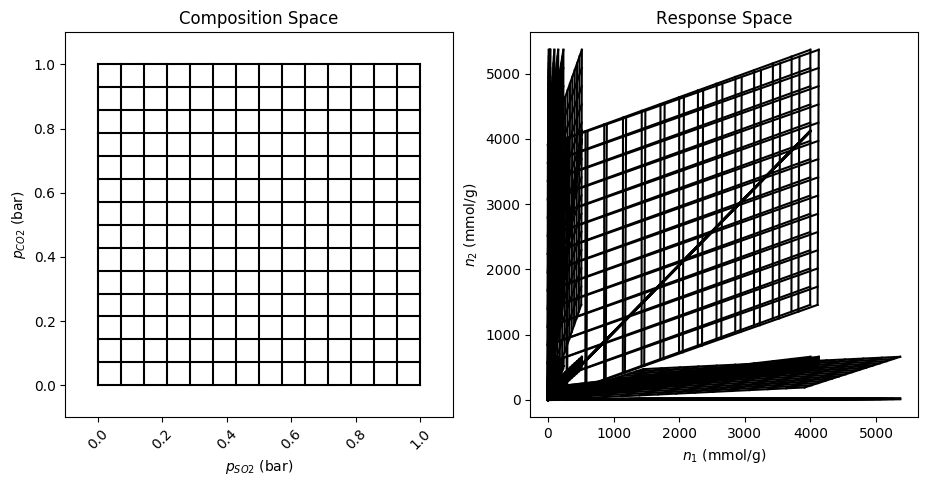

In [35]:
plot_rectangle3("SO2", "CO2", 1.0, 1.0)